<a href="https://colab.research.google.com/github/Gabriel325896/Analisis-Numerico/blob/main/Capitulo_3_ejercicios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import sympy as sp
from scipy import optimize
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [ ]:
def descent_grad_optim_step(x, f, grad, epsi, max_iter):  
  xs = np.zeros((1 + max_iter, len(x)))
  xs[0,:] = x
  for i in range(max_iter):
    g = grad(*x)
    def phi(s):
      params=x-s*g.T
      params=params[0,:]
      return f(*params)
    alpha = optimize.fminbound(phi, 0, 10)
    x = x - alpha * g.T
    x=x[0,:]
    xs[i+1,:] = x
    tol = np.linalg.norm(g)
    if tol < epsi:
     break
  return xs,i+1

In [ ]:
def descent_grad_fixed_step(x, grad, a, max_iter, epsi): 
  xs = np.zeros((1 + max_iter, len(x)))
  xs[0,:] = x
  
  for i in range(max_iter):
      g=grad(*x)
      x = x - a * g.T
      x=x[0,:]
      xs[i+1,:] = x
      tol = np.linalg.norm(grad(*x))
      if tol < epsi:
       break
  return xs,i+1

In [ ]:
def gradient(f,*variables):
  n=len(variables)
  m=1
  grad=sp.zeros(n,m)
  i=0
  for var in variables:
    grad[i,0]=sp.diff(f,var)
    i+=1
  return grad
def hessian(f,*variables):
  n=len(variables)
  m=n
  hess=sp.zeros(n,m)
  for i in range(0,n):
   for j in range(0,n):
  
    first_diff=sp.diff(f,variables[j])
    second_diff=sp.diff(first_diff,variables[i])
    hess[i,j]=second_diff  
  return hess

# Problema 1:

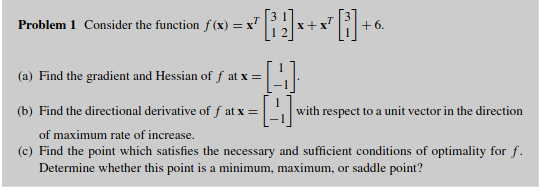

## a)

In [ ]:
sp.init_printing()

x1p1 = sp.Symbol('x1')
x2p1 = sp.Symbol('x2')
xp1 = sp.Matrix([x1p1,x2p1])
ap1 = sp.Matrix([[3,1],[1,2]])
bp1 = sp.Matrix([3,1])
fp1 = xp1.T*ap1*xp1 +xp1.T*bp1 + sp.Matrix([6])

gradp1 = gradient(fp1,x1p1,x2p1)
hessp1 = hessian(fp1,x1p1,x2p1)
grad_valp1 = sp.lambdify([x1p1,x2p1],gradp1)
hess_valp1 =sp.lambdify([x1p1,x2p1],hessp1)
gradx0p1 = grad_valp1(1,-1)
hessx0p1 = hess_valp1(1,-1)

print('f(x) : \n')
print(*fp1,sep=' ; \n')
print('')
print('Gradiente(x) : \n')
print(*gradp1,sep=' ; \n')
print('')
print('Hessiano(x): \n',hessp1)
print('')
print('Gradiente((1,-1)): \n',gradx0p1)
print('')
print('Hessiano((1,-1)): \n',hessx0p1)

f(x) : 

x1*(3*x1 + x2) + 3*x1 + x2*(x1 + 2*x2) + x2 + 6

Gradiente(x) : 

6*x1 + 2*x2 + 3 ; 
2*x1 + 4*x2 + 1

Hessiano(x): 
 Matrix([[6, 2], [2, 4]])

Gradiente((1,-1)): 
 [[ 7]
 [-1]]

Hessiano((1,-1)): 
 [[6 2]
 [2 4]]


## b)

In [ ]:
vec_mirp1 = grad_valp1(1,-1)
vec_nrmp1 = vec_mirp1/np.linalg.norm(vec_mirp1)
der_dirp1 = gradp1.T.dot(vec_nrmp1)
der_dicp1 = sp.lambdify([x1p1,x2p1],der_dirp1)
der_dicp1_2 = grad_valp1(1,-1).T.dot(vec_nrmp1)

print('Gradiente normalizado (G.N.) en (1,-1): \n',vec_nrmp1)
print('')
print('Der. direccional en funcion de G.N.: \n',der_dirp1)
print('')
print('Der. direccional en (1, -1): \n',*der_dicp1_2)

Gradiente normalizado (G.N.) en (1,-1): 
 [[ 0.98994949]
 [-0.14142136]]

Der. direccional en funcion de G.N.: 
 5.65685424949238*x1 + 1.41421356237309*x2 + 2.82842712474619

Der. direccional en (1, -1): 
 [7.07106781]


## c)

In [ ]:
raices_gradp1 = sp.solve(gradp1)
d1 = sp.Symbol('d1')
d2 = sp.Symbol('d2')
d = sp.Matrix([d1,d2])
conditionp1 = d.T*hessp1*d
direction_pos = sp.solve(conditionp1)
eigenvaluesp1 = hessp1.eigenvals()

print('Raices del gradiente: \n',raices_gradp1)
print('')
print('Eigenvalores del Hessiano: \n',eigenvaluesp1)
print('')
print('Al ser positivos, la matriz Hessiana es positiva por tanto el punto es un minimo.')

Raices del gradiente: 
 {x1: -1/2, x2: 0}

Eigenvalores del Hessiano: 
 {5 - sqrt(5): 1, sqrt(5) + 5: 1}

Al ser positivos, la matriz Hessiana es positiva por tanto el punto es un minimo.


# Punto 2:

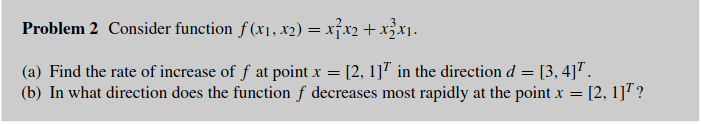

## a)

In [ ]:
x1p2 = sp.Symbol('x1')
x2p2 = sp.Symbol('x2')
fxp2 = ((x1p2**2)*x2p2) + ((x2p2**3)*x1p2)
gradp2 = gradient(fxp2,x1p2,x2p2)
grad_valp2 = sp.lambdify([x1p2,x2p2],gradp2)
grad_pointp2 = grad_valp2(2,1)
vectordp2 = np.array([[3],[4]])
d_normalicep2 = vectordp2/np.linalg.norm(vectordp2)
rd_dp2 = grad_pointp2.T.dot(d_normalicep2) 

print('Gradiente([2,1]): \n',grad_pointp2)
print('')
print('La derivada con respecto a [3,4]: \n',rd_dp2)

Gradiente([2,1]): 
 [[ 5]
 [10]]

La derivada con respecto a [3,4]: 
 [[11.]]


## b)

In [ ]:
mvr_p2 = -grad_pointp2
min_normp2 = mvr_p2/np.linalg.norm(mvr_p2)
drmp2 = grad_pointp2.T.dot(min_normp2)

print('En el punto [2,1] la funcion decrese con: \n',*drmp2)

En el punto [2,1] la funcion decrese con: 
 [-11.18033989]


# Punto 3:

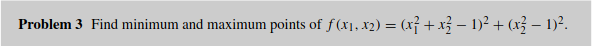

In [ ]:
x1p3 = sp.Symbol('x1')
x2p3 = sp.Symbol('x2')
fp3 = (x1p3**2+x2p3**2-1)**2 + (x2p3**2-1)**2 
gradp3 = gradient(fp3,x1p3,x2p3)
fx_valp3 = sp.lambdify([x1p3,x2p3],fp3)
grad_valp3 = sp.lambdify([x1p3,x2p3],gradp3)

# Desenso del gradiente:
x0 = np.array([4,8])
epsi = 0.01;
max_iter = 1000
res1 = descent_grad_optim_step(x0, fx_valp3, grad_valp3, epsi, max_iter)
xmin = res1[0]
iter = res1[1]

print('Minimo global en:')
print('x1 = {}, x2 = {}'.format(xmin[iter,0], xmin[iter,1]))

Minimo global en:
x1 = -0.10914710950144703, x2 = 0.9970633521654286


# Problema 4:

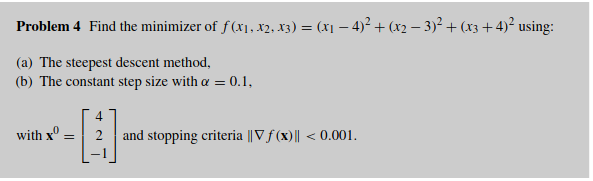

## a)

In [ ]:
x1p4 = sp.Symbol('x1')
x2p4 = sp.Symbol('x2')
x3p4 = sp.Symbol('x3')
fp4 = (x1p4-4)**2 + (x2p4-3)**2 + (x3p4+4)**2
gradp4 = gradient(fp4,x1p4,x2p4,x3p4)
fx_valp4 = sp.lambdify([x1p4,x2p4,x3p4],fp4)
grad_valp4 = sp.lambdify([x1p4,x2p4,x3p4],gradp4)
valuep4 = grad_valp4(1,2,3)

##Dentro de mas variables cambiamos el metodo de gradiente descendente
x0 = np.array([4,2,-1])
epsi = 0.001;
max_iter = 1000
g=grad_valp4(4,2,-1)
res1 = descent_grad_optim_step(x0, fx_valp4, grad_valp4, epsi, max_iter)
xmin = res1[0]
iter = res1[1]


print(f'El minimo global se encuentra en x1={xmin[iter,0]},',
      f'x2={xmin[iter,1]} y ',f'x3={xmin[iter,2]}.Luego de {iter} iteraciones')

El minimo global se encuentra en x1=4.0, x2=3.0 y  x3=-4.0.Luego de 2 iteraciones


## b)

In [ ]:
x1=sp.Symbol('x1')
x2=sp.Symbol('x2')
x3=sp.Symbol('x3')
fx=(x1-4)**2 + (x2-3)**2 + (x3+4)**2
grad=gradient(fx,x1,x2,x3)
fx_val=sp.lambdify([x1,x2,x3],fx)
grad_val=sp.lambdify([x1,x2,x3],grad)
value=grad_val(1,2,3)
x0 = np.array([4,3,-1])
epsi = 0.001;
max_iter = 1000
g=grad_val(4,2,-1)
step=0.1
res1 = descent_grad_fixed_step(x0, grad_val,step, max_iter,epsi)
xmin = res1[0]
iter = res1[1]

print(f'El minimo global se encuentra en x1={xmin[iter,0]},',
      f'x2={xmin[iter,1]} y ',f'x3={xmin[iter,2]}.Luego de {iter} iteraciones')

El minimo global se encuentra en x1=4.0, x2=3.0 y  x3=-3.9995015395015807.Luego de 39 iteraciones


# Problema 5:

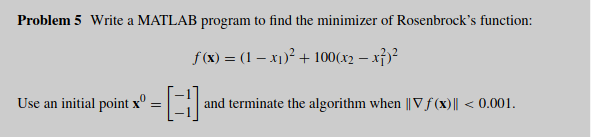

In [ ]:
x1=sp.Symbol('x1')
x2=sp.Symbol('x2')
fx=(1-x1)**2 + 100*(x2-x1**2)**2 
grad=gradient(fx,x1,x2)
fx_val=sp.lambdify([x1,x2],fx)
grad_val=sp.lambdify([x1,x2],grad)
x0 = np.array([-1,1])
epsi = 0.001;
max_iter = 10000
res1 = descent_grad_optim_step(x0, fx_val, grad_val, epsi, max_iter)
xmin = res1[0]
iter = res1[1]
print(f'El minimo global se encuentra en x1={xmin[iter,0]},',
      f'x2={xmin[iter,1]}.Luego de {iter} iteraciones')

El minimo global se encuentra en x1=0.9999988283439782, x2=0.9999976539057863.Luego de 3 iteraciones
